In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('fivethirtyeight')


def _numerical_differential(f, x):
    """
    Numerical differential.
    
    Args:
        f:    Function.
        x:    Observed data points.
    
    Returns:
        Result.
    """
    h = 1e-04
    return (f(x+h) - f(x)) / h


def numerical_differential(f, x):
    """
    Numerical differential(central differences).
    
    Args:
        f:    Function.
        x:    Observed data points.
    
    Returns:
        Result.
    """
    h = 1e-4
    return (f(x + h) - f(x - h)) /(2 * h)


def demo_function(x):
    """
    Function for demo.
    
    Args:
        x:    Observed data points.
    
    Returns:
        Result.
    """
    return x**2


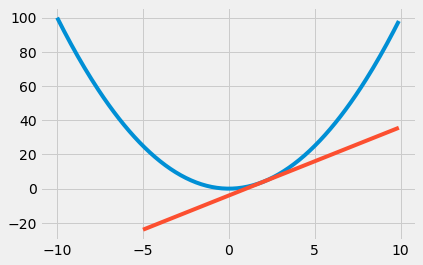

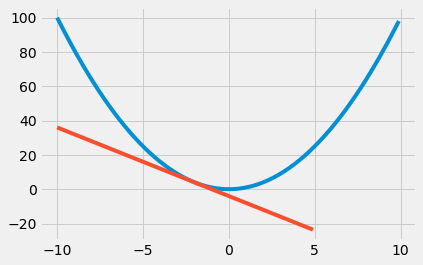

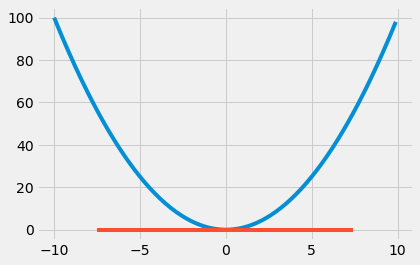

In [2]:
x1 = np.arange(-10.0, 10.0, 0.1)
x2 = np.arange(-5.0, 10.0, 0.1)
x3 = np.arange(-10.0, 5.0, 0.1)
x4 = np.arange(-7.50, 7.50, 0.1)

p = 2

y1 = demo_function(x1)

d = numerical_differential(demo_function, p)
y2 = d * x2 + demo_function(p) - d * p

p = -2
d = numerical_differential(demo_function, p)
y3 = d * x3 + demo_function(p) - d * p

p = 0
d = numerical_differential(demo_function, p)
y4 = d * x4 + demo_function(p) - d * p

plt.plot(x1, y1)
plt.plot(x2, y2)
plt.show()
plt.plot(x1, y1)
plt.plot(x3, y3)
plt.show()
plt.plot(x1, y1)
plt.plot(x4, y4)
plt.show()

In [4]:
def function_2 (xy):
    return (xy[0] ** 2) + (xy[1] ** 2)

def partial_diff_x(xy):
    return (xy[0]**2) + (4**2)

def partial_diff_y(xy):
    return (3 ** 2) + (xy[1] ** 2)

xy = np.array([3, 4])
dX = numerical_differential(partial_diff_x, xy)
dY = numerical_differential(partial_diff_y, xy)

dX, dY

(6.00000000000378, 7.999999999999119)

In [5]:
def numerical_partial_differential_x(f, x, y):
    """
    Numerical partial differential(central differences) for `x`.
    
    Args:
        f:    Function.
        x:    Observed data points.
    
    Returns:
        Result.
    """
    h = 1e-4
    return (f(x + h, y) - f(x - h, y)) /(2 * h)

def numerical_partial_differential_y(f, x, y):
    """
    Numerical partial differential(central differences) for `y`.
    
    Args:
        f:    Function.
        x:    Observed data points.
    
    Returns:
        Result.
    """
    h = 1e-4
    return (f(x, y + h) - f(x, y - h)) /(2 * h)

def demo_function2(x, y):
    return (x ** 2) + (y ** 2)

x = np.array([3])
y = np.array([4])
dX = numerical_partial_differential_x(demo_function2, x=x, y=y[0])
dY = numerical_partial_differential_y(demo_function2, x=x[0], y=y)

dX[0], dY[0]

(6.00000000000378, 7.999999999999119)

In [6]:
def grad_descent(f, x):
    """
    Gradient descent.
    
    Args:
        f:    Function.
        x:    Observed data point.
    
    Returns:
        Tuple(point, loss)
    """
    # Threshold for determining when to stop repeating.
    epsilon = 1e-10
    # so-called `learning rate`.
    step_size = 1e-4
 
    x_before = x

    # Move `x` according to the differential coefficient at the observed data point.
    x_after = x_before - step_size * numerical_differential(f, x_before)
 
    diff_x = abs(x_before - x_after)

    # Repeat the search.
    while diff_x > epsilon:
        x_before = x_after
        x_after = x_before - step_size * numerical_differential(f, x_before)
        diff_x = abs(x_before - x_after)

    return x_after

In [7]:
p = grad_descent(demo_function, x=2)

In [8]:
p

4.998423530474727e-07

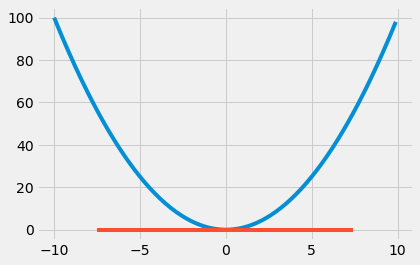

In [9]:
x5 = np.arange(-7.50, 7.50, 0.1)
d = numerical_differential(demo_function, p)
y5 = d * x5 + demo_function(p) - d * p

plt.plot(x1, y1)
plt.plot(x5, y5)
plt.show()

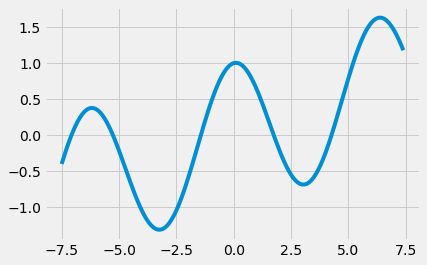

In [10]:
def demo_function3(x):
    return np.cos(x) + x / 10

_x = np.arange(-7.50, 7.50, 0.1)
_y = demo_function3(_x)

plt.plot(_x, _y)
plt.show()

In [11]:
p = grad_descent(demo_function3, x=2.5)
p

3.0414242273486343

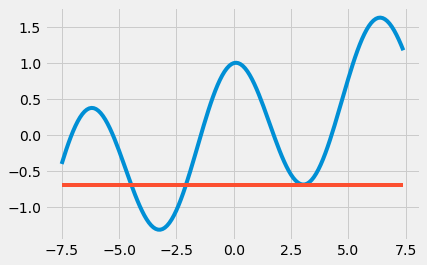

In [12]:
d = numerical_differential(demo_function3, p)
y6 = d * _x + demo_function3(p) - d * p

plt.plot(_x, _y)
plt.plot(_x, y6)
plt.show()

In [13]:
p = grad_descent(demo_function3, x=-2.5)

In [14]:
p

-3.241759070039928

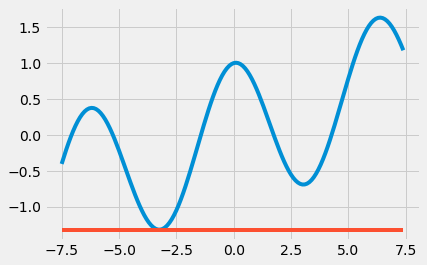

In [15]:
d = numerical_differential(demo_function3, p)
y7 = d * _x + demo_function3(p) - d * p

plt.plot(_x, _y)
plt.plot(_x, y7)
plt.show()

[-4.34733156e-09 -2.17366578e-09]


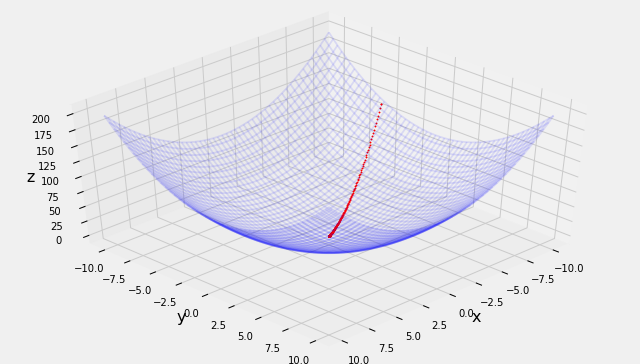

In [16]:
from mpl_toolkits.mplot3d import axes3d, Axes3D
plt.style.use('seaborn-notebook')

# for 3D Grid.
fig = plt.figure(figsize = (10, 6))
ax = fig.add_subplot(111, projection="3d")
ax.set_xlabel("x", size = 16)
ax.set_ylabel("y", size = 16)
ax.set_zlabel("z", size = 16)

# Create meshgrid.
x = np.arange(-10.0, 10.0, 0.1)
y = np.arange(-10.0, 10.0, 0.1)
X, Y = np.meshgrid(x, y)

# Plot Wire frame.
Z = demo_function2(X, Y)
ax.plot_wireframe(X, Y, Z, color = "blue", zorder = 1, alpha=0.1)
ax.view_init(45, 45)

# Init.
x = -10
y = -5

# Learning rate
step_size = 0.01

# # Threshold for determining when to stop repeating.
epsilon = 1e-10

# Compute grad.
x_before = x
y_before = y
x_after = x_before - (step_size * numerical_partial_differential_x(demo_function2, x, y))
y_after = y_before - (step_size * numerical_partial_differential_y(demo_function2, x, y))

# Compute loss.
loss = np.sqrt(np.square(x_after - x_before) + np.square(y_after - y_before))

while loss > epsilon:
    # Plot `p`
    ax.scatter(x_after, y_after, demo_function2(x_after, y_after), s=2, color="red", zorder=2)

    # Compute grad.
    x_after = x_before - (step_size * numerical_partial_differential_x(demo_function2, x_before, y_before))
    y_after = y_before - (step_size * numerical_partial_differential_y(demo_function2, x_before, y_before))

    # Compute loss.
    loss = np.sqrt(np.square(x_after - x_before) + np.square(y_after - y_before))

    x_before = x_after
    y_before = y_after

# Minimum.
print(np.array([x_after, y_after]))